In [4]:
import os, json
from copy import deepcopy
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from pprint import pprint
print("done 2")

done 2


In [1]:
dataDir = 'data/'

testTargets = [
    '587739407868690486',
    '587727178988388373',
]

trainTargets = [
    '1237678620102623480',
    '587722984435351614',
    '587732136993882121',
    '587732772130652231',
    '587734862680752822',
    '587735043609329845',
    '587738569246376675',
    '587741391565422775',
    '587742014353702970',
    '587745402001817662',
    '588013383816904792',
    '588017978901528612',
    '588018055130710322',
    '758877153600208945',
    'hst_Arp_273',
    'hst_ESO_77-14',
    'hst_NGC_6786',
]

#print( os.listdir( dataDir ) )

with open( dataDir + 'data-key.json' ) as keyFile:
    key = json.load( keyFile )

def convertSlice( dictIn ):
    dictOut = deepcopy( dictIn )
    for k in dictOut:
        if type( dictOut[k] ) == type( 'string' ):
            if 'slice' in dictOut[k]:
                #print( k, dictOut[k] )
                tmp = dictOut[k].split('(')[1].split(')')[0].split(',')
                s = int( tmp[0] )
                e = int( tmp[1] )
                dictOut[k] = slice( s, e )
                print( dictOut[k] )
    
    return dictOut 

key = convertSlice( key )
print('')
pprint( key )


NameError: name 'json' is not defined

In [4]:
# Scale data of individual targets
rawDir  = 'data/raw/'
normDir = 'data/norm-targets/'

for i in key['targets']:
    
    t = key['targets'][i]
    
    print( i, t )
    
    data = np.load( rawDir + 'data-%s.npy' % t )
    
    spamScaler = StandardScaler()
    rminScaler = StandardScaler()
    
    data[ :, key['model'] ] = spamScaler.fit_transform( data[:,key['model']] )
    data[ :, key['min'] ]   = rminScaler.fit_transform( data[:,key['min']] )
                                                             
    np.save( normDir + 'data-%s' % t, data )
    pkl.dump( spamScaler, open( normDir + 'scaler-spam-%s.pkl' % t, 'wb' ) )
    pkl.dump( rminScaler, open( normDir + 'scaler-rmin-%s.pkl' % t, 'wb' ) )

print("Done")

NameError: name 'dataKey' is not defined

In [9]:
rawDir  = 'data/raw/'
normDir = 'data/norm-targets/'

t = key['targets'][f]

# Initiate All arrays
dataList = []
imgList  = []

n = 0

# Loop through each target
for i,t in enumerate(testTargets):
    
    # t = dataKey['targets'][i]
    rawData = np.load( rawDir + 'data-%s.npy' % t )
    rawImg  = np.load( rawDir + 'img-%s.npy' % t )
    
    n += rawData.shape[0]
    
    dataList.append( rawData )
    imgList.append( rawImg )

    print( i, n, rawData.shape[0] )
    
# Loop through each target
for i,t in enumerate( trainTargets ):
    
    # t = dataKey['targets'][i]
    rawData = np.load( rawDir + 'data-%s.npy' % t )
    rawImg  = np.load( rawDir + 'img-%s.npy' % t )
    
    n += rawData.shape[0]
    
    dataList.append( rawData )
    imgList.append( rawImg )

    print( i, n, rawData.shape[0] )
    
print("DONE")

0 143 143
1 437 294
0 681 244
1 996 315
2 1206 210
3 1378 172
4 1605 227
5 2629 1024
6 2705 76
7 2862 157
8 2985 123
9 3051 66
10 3161 110
11 3344 183
12 3538 194
13 5086 1548
14 5513 427
15 5811 298
16 7060 1249
DONE


In [10]:
print( n )

7060


(7060, 25) (7060, 128, 128, 3)


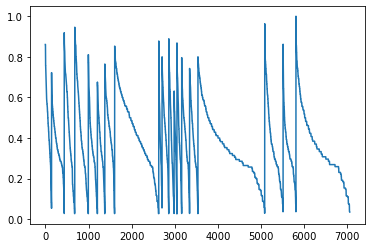

In [11]:
allRawImg  = np.zeros(( n, 128, 128, 3 ))
allRawData = np.zeros(( n, dataList[0][0].shape[0] ))

print( allRawData.shape, allRawImg.shape )

nTargets = len( imgList )

j = 0
for i in range( nTargets ):
    k = imgList[i].shape[0]
    
    allRawImg[ j:j+k ] = imgList[i]
    allRawData[ j:j+k ] = dataList[i]
    j += k
    #print( k )

plt.plot( allRawData[:,0] )

In [14]:
# Create scalers of spam and rmin
d1_spam_scaler = StandardScaler()
d1_rmin_scaler = StandardScaler()

spamScaled = d1_spam_scaler.fit_transform( allRawData[:, key['model'] ] )
pkl.dump( spamScaled, open( 'data/scaler-spam.pkl', 'wb' ) )

rminScaled = d1_spam_scaler.fit_transform( allRawData[:, key['min'] ] )
pkl.dump( rminScaled, open( 'data/scaler-rmin.pkl', 'wb' ) )

allNormData = allRawData
allNormData[:,key['model']] = spamScaled
allNormData[:,key['min']]   = rminScaled

normLoc = 'data/data-all'
np.save( normLoc, allNormData ) 

imgLoc = 'data/img-all'
np.save( imgLoc, allRawImg )

print("done")


done


In [ ]:
allData = np.load('data/data-all.npy')
allImage = np.load( 'data/images-all.npy' )
print( allImage.shape )

In [31]:

vTestTargets = []

for k in key['targets']:
    t = key['targets'][k]
    if t in testTargets:
        vTestTargets.append( k )
        print( k, t )

# Creat mask of

mTargets = np.full(n, False)

for tid in vTestTargets:
    
    m = allNormData[:, key['tid']] ==  float( tid )
    
    mTargets = np.logical_or( mTargets, m )
    

5 587727178988388373
21 587739407868690486


In [33]:
ith = 5

# Grab every ith for training/testing
mith = np.full(n, False)
mith[::ith] = True

# Create combined mask
#testMask = np.logical_or( mTargets, mith )
testMask = mith

testImg  = allRawImg[testMask]
testData = allNormData[testMask]

trainImg  = allRawImg[~testMask]
trainData = allNormData[~testMask]

print( testData.shape, testImg.shape )
print( trainData.shape, trainData.shape )
print( 'Ratio: ', testData.shape[0] / ( testData.shape[0] + trainData.shape[0] ) )

(1412, 25) (1412, 128, 128, 3)
(5648, 25) (5648, 25)
Ratio:  0.2


In [ ]:

np.save( 'data/test-data', testData )
np.save( 'data/test-img', testImg )
np.save( 'data/train-data', trainData )
np.save( 'data/train-img', trainImg )


In [5]:
trainData = np.load('data/train-data.npy')
print('trainData: ', trainData.shape )
trainImg  = np.load('data/train-img.npy')
print('trainImg: ', trainImg.shape )

trainData:  (5648, 25)
trainImg:  (5648, 128, 128, 3)


In [6]:

# Shuffle training data
p = np.random.permutation( trainData.shape[0] )
trainData = trainData[p]
trainImg = trainImg[p]

np.save( 'data/train-data', trainData )
np.save( 'data/train-img', trainImg )


In [8]:
print("DONE")

DONE
